In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gcparks = pd.read_excel('GCPARKS.xlsx')
attendance = pd.read_excel('Attendance.xlsx')
attendance = attendance.set_index('Unnamed: 0')

In [3]:
#Remove Unneeded Columns
gcparks = gcparks.drop('Setid', axis =1)
gcparks = gcparks.drop('Client ID-Claim', axis =1)
gcparks = gcparks.drop('Incident to Claim Date', axis =1)
gcparks = gcparks.drop('Coverage', axis =1)

In [4]:
#Split Datasets into specific parks

grouped = gcparks.groupby('Personnel Area Desc')

dfs = {}

for division, subset in grouped:
    dfs[division] = subset
    
for division_name in dfs.keys():
    print(division_name)

0569 - EPCOT - FL
0663 - Disney's Hollywood Studios - FL
2092 - MAGIC KINGDOM 1029 - FL
2227 - ANIMAL KINGDOM 1029 - FL


In [5]:
ecdf = dfs['0569 - EPCOT - FL']
hsdf = dfs['0663 - Disney\'s Hollywood Studios - FL']
mkdf = dfs['2092 - MAGIC KINGDOM 1029 - FL']
akdf = dfs['2227 - ANIMAL KINGDOM 1029 - FL']

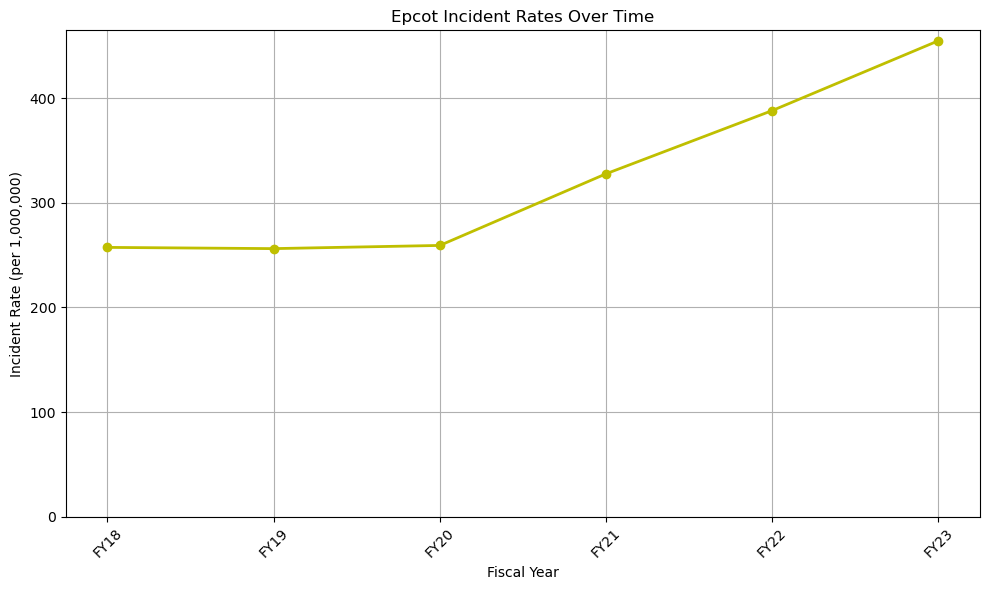

In [6]:
##Metrics EPCOT

#Incidents
ECtotalunique = ecdf['Claim Number'].nunique()
ECIncidentClaimFY = ecdf.groupby('Fiscal Year')['Claim Number'].nunique()


#Claims Number
ECclaimcount = ecdf[ecdf['Claim Status'] != 'INCIDENT']['Claim Number'].nunique()

#By Fiscal Year
ECfiscalyear = ecdf[ecdf['Claim Status'] != 'INCIDENT'].groupby('Fiscal Year')['Claim Number'].nunique()

#Incurred Total
ECincurredyear = ecdf[ecdf['Claim Status'] != 'INCIDENT'].groupby('Fiscal Year').agg({'Claim Number': 'nunique', 'Disney Claim Total Incurred': 'sum'})
ECincurredtotal = ECincurredyear['Disney Claim Total Incurred'].sum()

#Rate
ECvalues_for_FY = {}  

fiscal_years = ['FY18', 'FY19', 'FY20', 'FY21', 'FY22', 'FY23']

for fiscal_year in fiscal_years:
    ECvalue_for_FY = attendance.loc[fiscal_year, 'Epcot']
    ECvalues_for_FY[fiscal_year] = ECvalue_for_FY
    
#ECfy18_Attendance = ECvalues_for_FY['FY18']
#ECfy19_Attendance = ECvalues_for_FY['FY19']
#ECfy20_Attendance = ECvalues_for_FY['FY20']
#ECfy21_Attendance = ECvalues_for_FY['FY21']
#ECfy22_Attendance = ECvalues_for_FY['FY22']
#ECfy23_Attendance = ECvalues_for_FY['FY23']

#fy18_IncidentClaims = ECIncidentClaimFY.get('FY18', 0)
#fy19_IncidentClaims = ECIncidentClaimFY.get('FY19', 0)
#fy20_IncidentClaims = ECIncidentClaimFY.get('FY20', 0)
#fy21_IncidentClaims = ECIncidentClaimFY.get('FY21', 0)
#fy22_IncidentClaims = ECIncidentClaimFY.get('FY22', 0)
#fy23_IncidentClaims = ECIncidentClaimFY.get('FY23', 0)

#ECincidentrate18 = (fy18_IncidentClaims / ECfy18_Attendance * 1000000)
#ECincidentrate19 = (fy19_IncidentClaims / ECfy19_Attendance * 1000000)
#ECincidentrate20 = (fy20_IncidentClaims / ECfy20_Attendance * 1000000)
#ECincidentrate21 = (fy21_IncidentClaims / ECfy21_Attendance * 1000000)
#ECincidentrate22 = (fy22_IncidentClaims / ECfy22_Attendance * 1000000)
#ECincidentrate23 = (fy23_IncidentClaims / ECfy23_Attendance * 1000000)

#LOOP FOR RATES 
ECincident_rates = {}

#fiscal_years = ['FY18', 'FY19', 'FY20', 'FY21', 'FY22', 'FY23']

for year in fiscal_years:
    ECattendance = ECvalues_for_FY.get(year, 0)
    ECincident_claims = ECIncidentClaimFY.get(year, 0)
    
    ECincident_rate = (ECincident_claims / ECattendance * 1000000)
    
    ECincident_rates[f'ECincidentrate{year[2:]}'] = ECincident_rate

#Year over Year Comparisons
ECincident_rates_values = [ECincident_rates.get(f'ECincidentrate{year[2:]}', 0) for year in fiscal_years]

plt.figure(figsize=(10, 6))
plt.plot(fiscal_years, ECincident_rates_values, marker='o', color='y', linestyle='-', linewidth=2)
plt.xlabel('Fiscal Year')
plt.ylabel('Incident Rate (per 1,000,000)')
plt.title('Epcot Incident Rates Over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

plt.ylim(0)

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

#Pull particular year
#ECincidentrate19 = ECincident_rates.get('ECincidentrate19', 0)

#Claim and Incident Rate per 1M Attendance

In [7]:
#EPCOT AREAS OF NOTE


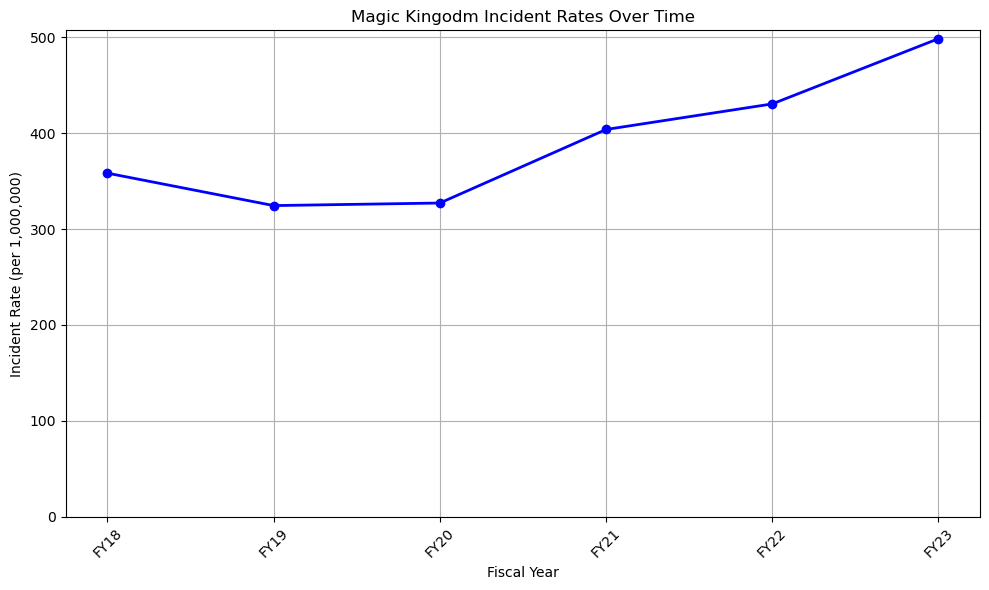

In [8]:
##Metrics Magic Kingdom

#Incidents
MKtotalunique = mkdf['Claim Number'].nunique()
MKIncidentClaimFY = mkdf.groupby('Fiscal Year')['Claim Number'].nunique()


#Claims Number
MKclaimcount = mkdf[mkdf['Claim Status'] != 'INCIDENT']['Claim Number'].nunique()

#By Fiscal Year
MKfiscalyear = mkdf[mkdf['Claim Status'] != 'INCIDENT'].groupby('Fiscal Year')['Claim Number'].nunique()

#Incurred Total
MKincurredyear = mkdf[mkdf['Claim Status'] != 'INCIDENT'].groupby('Fiscal Year').agg({'Claim Number': 'nunique', 'Disney Claim Total Incurred': 'sum'})
MKincurredtotal = MKincurredyear['Disney Claim Total Incurred'].sum()

#Rate
MKvalues_for_FY = {}  

fiscal_years = ['FY18', 'FY19', 'FY20', 'FY21', 'FY22', 'FY23']

for fiscal_year in fiscal_years:
    MKvalue_for_FY = attendance.loc[fiscal_year, 'MK']
    MKvalues_for_FY[fiscal_year] = MKvalue_for_FY
    
#LOOP FOR RATES 
MKincident_rates = {}

#fiscal_years = ['FY18', 'FY19', 'FY20', 'FY21', 'FY22', 'FY23']

for year in fiscal_years:
    MKattendance = MKvalues_for_FY.get(year, 0)
    MKincident_claims = MKIncidentClaimFY.get(year, 0)
    
    MKincident_rate = (MKincident_claims / MKattendance * 1000000)
    
    MKincident_rates[f'MKincidentrate{year[2:]}'] = MKincident_rate

#Year over Year Comparisons
MKincident_rates_values = [MKincident_rates.get(f'MKincidentrate{year[2:]}', 0) for year in fiscal_years]

plt.figure(figsize=(10, 6))
plt.plot(fiscal_years, MKincident_rates_values, marker='o', color='b', linestyle='-', linewidth=2)
plt.xlabel('Fiscal Year')
plt.ylabel('Incident Rate (per 1,000,000)')
plt.title('Magic Kingodm Incident Rates Over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

plt.ylim(0)

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

#Pull particular year
#MKincidentrate19 = MKincident_rates.get('MKincidentrate19', 0)

#Claim and Incident Rate per 1M Attendance

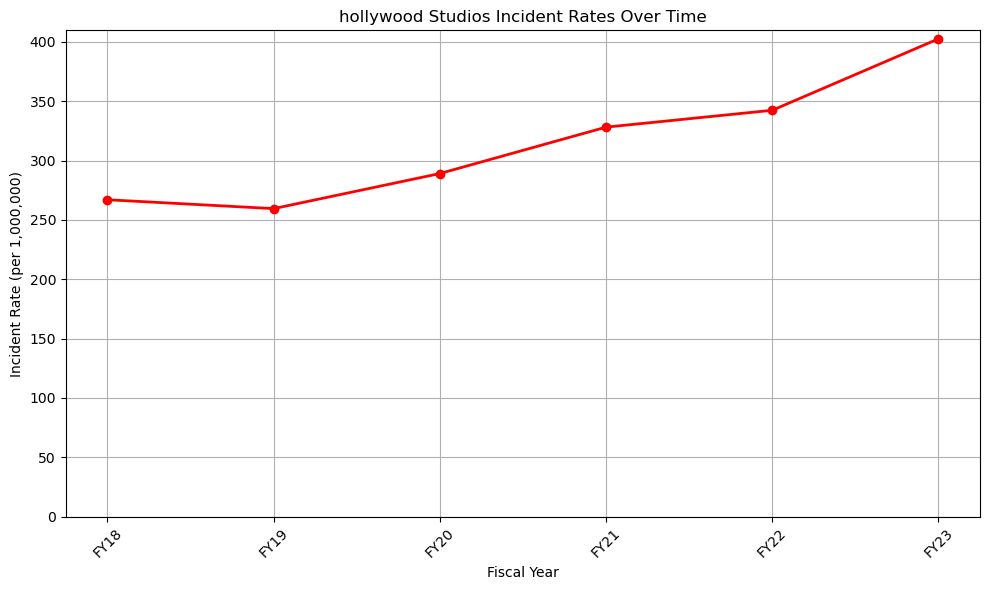

In [9]:
##Metrics Hollywood Studios

#Incidents
HStotalunique = hsdf['Claim Number'].nunique()
HSIncidentClaimFY = hsdf.groupby('Fiscal Year')['Claim Number'].nunique()


#Claims Number
HSclaimcount = hsdf[hsdf['Claim Status'] != 'INCIDENT']['Claim Number'].nunique()

#By Fiscal Year
HSfiscalyear = hsdf[hsdf['Claim Status'] != 'INCIDENT'].groupby('Fiscal Year')['Claim Number'].nunique()

#Incurred Total
HSincurredyear = hsdf[hsdf['Claim Status'] != 'INCIDENT'].groupby('Fiscal Year').agg({'Claim Number': 'nunique', 'Disney Claim Total Incurred': 'sum'})
HSincurredtotal = HSincurredyear['Disney Claim Total Incurred'].sum()

#Rate
HSvalues_for_FY = {}  

fiscal_years = ['FY18', 'FY19', 'FY20', 'FY21', 'FY22', 'FY23']

for fiscal_year in fiscal_years:
    HSvalue_for_FY = attendance.loc[fiscal_year, 'DHS']
    HSvalues_for_FY[fiscal_year] = HSvalue_for_FY
    
#LOOP FOR RATES 
HSincident_rates = {}

#fiscal_years = ['FY18', 'FY19', 'FY20', 'FY21', 'FY22', 'FY23']

for year in fiscal_years:
    HSattendance = HSvalues_for_FY.get(year, 0)
    HSincident_claims = HSIncidentClaimFY.get(year, 0)
    
    HSincident_rate = (HSincident_claims / HSattendance * 1000000)
    
    HSincident_rates[f'HSincidentrate{year[2:]}'] = HSincident_rate

#Year over Year Comparisons
HSincident_rates_values = [HSincident_rates.get(f'HSincidentrate{year[2:]}', 0) for year in fiscal_years]

plt.figure(figsize=(10, 6))
plt.plot(fiscal_years, HSincident_rates_values, marker='o', color='r', linestyle='-', linewidth=2)
plt.xlabel('Fiscal Year')
plt.ylabel('Incident Rate (per 1,000,000)')
plt.title('hollywood Studios Incident Rates Over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

plt.ylim(0)

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

#Pull particular year
#HSincidentrate19 = HSincident_rates.get('HSincidentrate19', 0) -- Change Number to year in question

#Claim and Incident Rate per 1M Attendance

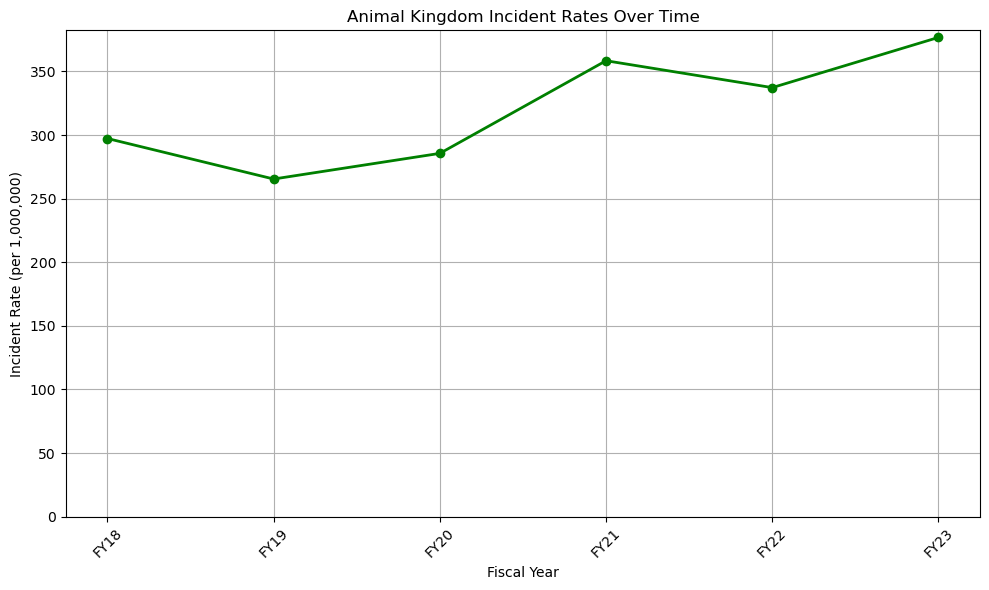

In [10]:
##Metrics Animal Kingdom

#Incidents
AKtotalunique = akdf['Claim Number'].nunique()
AKIncidentClaimFY = akdf.groupby('Fiscal Year')['Claim Number'].nunique()


#Claims Number
AKclaimcount = akdf[akdf['Claim Status'] != 'INCIDENT']['Claim Number'].nunique()

#By Fiscal Year
AKfiscalyear = akdf[akdf['Claim Status'] != 'INCIDENT'].groupby('Fiscal Year')['Claim Number'].nunique()

#Incurred Total
AKincurredyear = akdf[akdf['Claim Status'] != 'INCIDENT'].groupby('Fiscal Year').agg({'Claim Number': 'nunique', 'Disney Claim Total Incurred': 'sum'})
AKincurredtotal = AKincurredyear['Disney Claim Total Incurred'].sum()

#Rate
AKvalues_for_FY = {}  

fiscal_years = ['FY18', 'FY19', 'FY20', 'FY21', 'FY22', 'FY23']

for fiscal_year in fiscal_years:
    AKvalue_for_FY = attendance.loc[fiscal_year, 'DAK']
    AKvalues_for_FY[fiscal_year] = AKvalue_for_FY
    
#LOOP FOR RATES 
AKincident_rates = {}

#fiscal_years = ['FY18', 'FY19', 'FY20', 'FY21', 'FY22', 'FY23']

for year in fiscal_years:
    AKattendance = AKvalues_for_FY.get(year, 0)
    AKincident_claims = AKIncidentClaimFY.get(year, 0)
    
    AKincident_rate = (AKincident_claims / AKattendance * 1000000)
    
    AKincident_rates[f'AKincidentrate{year[2:]}'] = AKincident_rate

#Year over Year Comparisons
AKincident_rates_values = [AKincident_rates.get(f'AKincidentrate{year[2:]}', 0) for year in fiscal_years]

plt.figure(figsize=(10, 6))
plt.plot(fiscal_years, AKincident_rates_values, marker='o', color='g', linestyle='-', linewidth=2)
plt.xlabel('Fiscal Year')
plt.ylabel('Incident Rate (per 1,000,000)')
plt.title('Animal Kingdom Incident Rates Over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

plt.ylim(0)

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

#Pull particular year
#AKincidentrate19 = AKincident_rates.get('AKincidentrate19', 0) -- Change Number to year in question

#Claim and Incident Rate per 1M Attendance

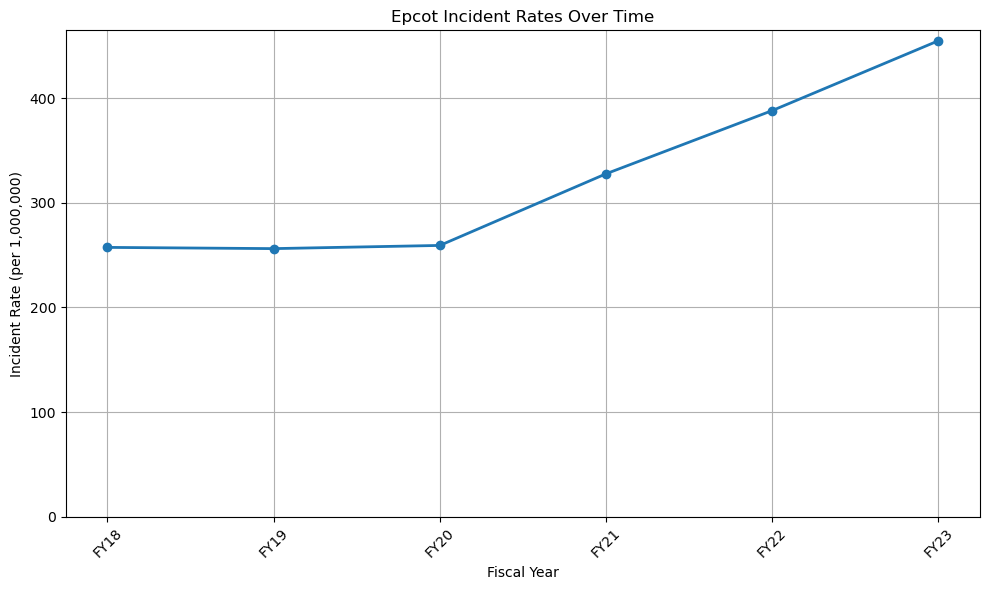

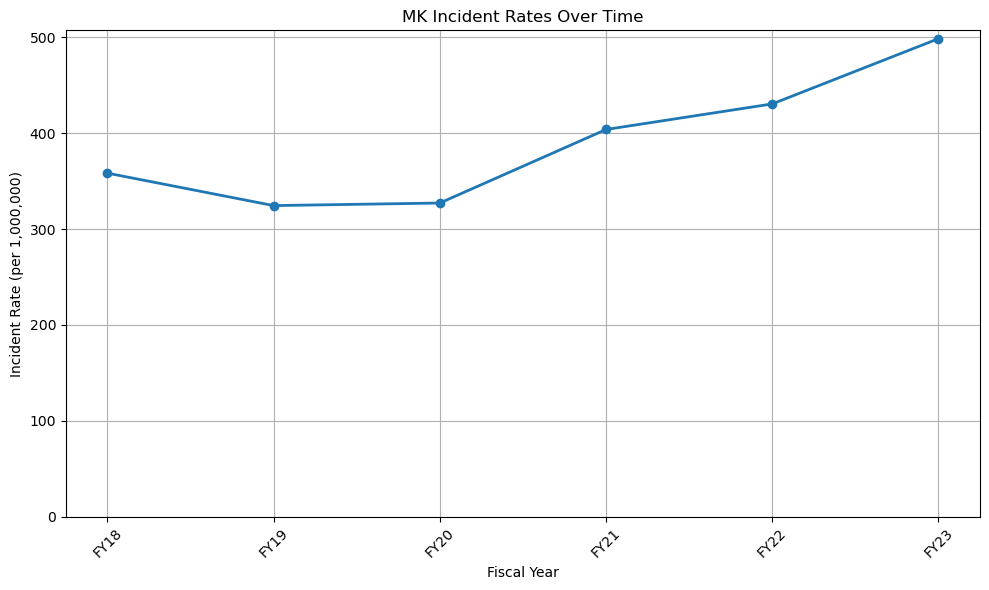

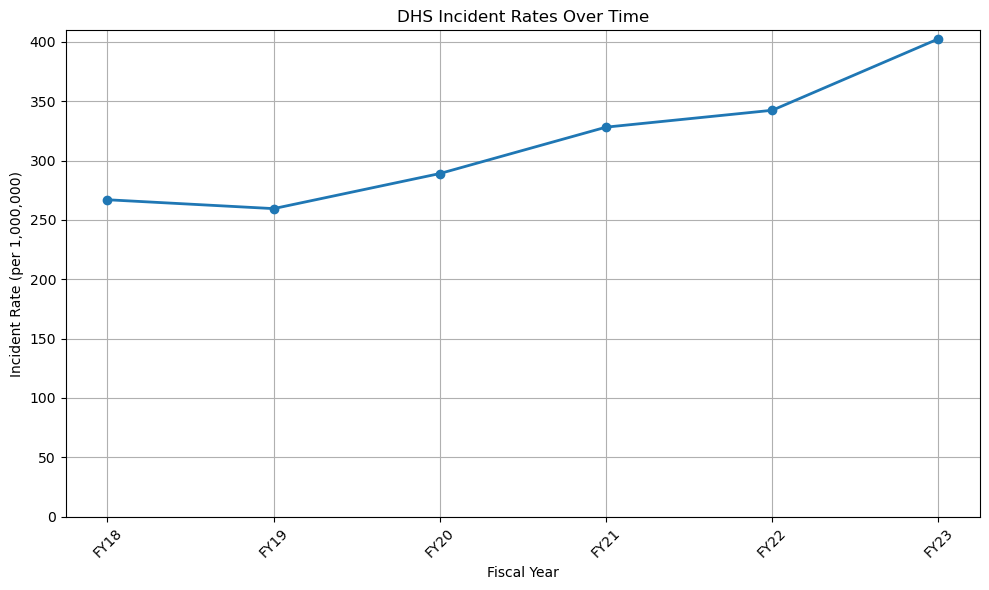

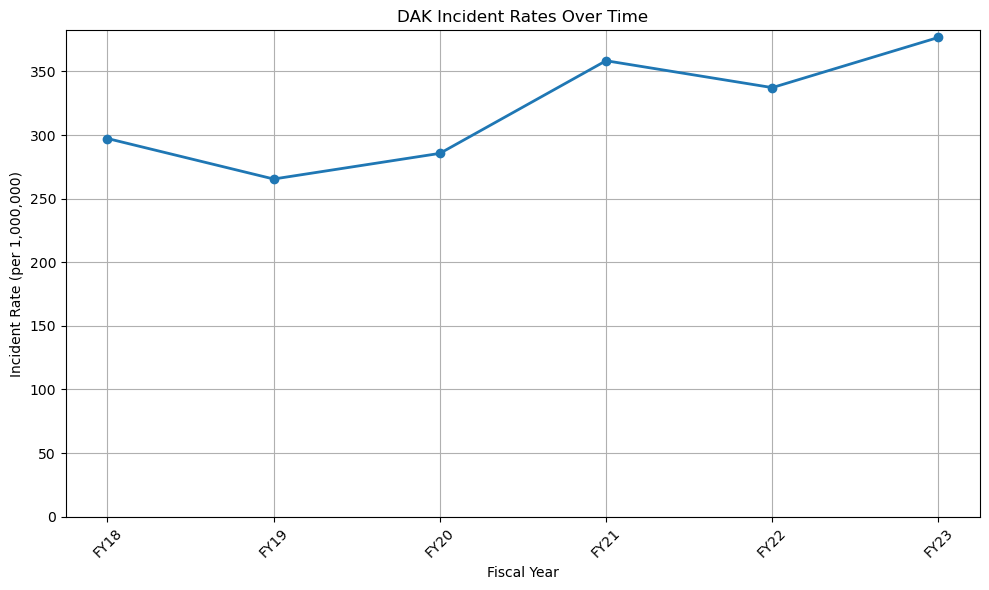

In [11]:
def calculate_incident_rates(df, location_name, attendance, fiscal_years):
    total_unique = df['Claim Number'].nunique()
    incident_claim_fy = df.groupby('Fiscal Year')['Claim Number'].nunique()

    claim_count = df[df['Claim Status'] != 'INCIDENT']['Claim Number'].nunique()

    incurred_year = df[df['Claim Status'] != 'INCIDENT'].groupby('Fiscal Year').agg({'Claim Number': 'nunique', 'Disney Claim Total Incurred': 'sum'})
    incurred_total = incurred_year['Disney Claim Total Incurred'].sum()

    values_for_fy = {}
    
    for fiscal_year in fiscal_years:
        value_for_fy = attendance.loc[fiscal_year, location_name]
        values_for_fy[fiscal_year] = value_for_fy
    
    incident_rates = {}
    
    for year in fiscal_years:
        attendance = values_for_fy.get(year, 0)
        incident_claims = incident_claim_fy.get(year, 0)
        
        incident_rate = (incident_claims / attendance * 1000000)
        
        incident_rates[f'{location_name.lower()}incidentrate{year[2:]}'] = incident_rate

    incident_rates_values = [incident_rates.get(f'{location_name.lower()}incidentrate{year[2:]}', 0) for year in fiscal_years]

    plt.figure(figsize=(10, 6))
    plt.plot(fiscal_years, incident_rates_values, marker='o', linestyle='-', linewidth=2)
    plt.xlabel('Fiscal Year')
    plt.ylabel('Incident Rate (per 1,000,000)')
    plt.title(f'{location_name} Incident Rates Over Time')
    plt.xticks(rotation=45)
    plt.ylim(0)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Define your locations, dataframes, and fiscal years
locations = ['Epcot', 'MK', 'DHS', 'DAK']
dataframes = [ecdf, mkdf, hsdf, akdf]
fiscal_years = ['FY18', 'FY19', 'FY20', 'FY21', 'FY22', 'FY23']

for location, df in zip(locations, dataframes):
    calculate_incident_rates(df, location, attendance, fiscal_years)


In [21]:
ECclaim_status_counts = ecdf['Claim or Incident?'].value_counts()
MKclaim_status_counts = mkdf['Claim or Incident?'].value_counts()
HSclaim_status_counts = hsdf['Claim or Incident?'].value_counts()
AKclaim_status_counts = akdf['Claim or Incident?'].value_counts()

In [27]:
summary_df = pd.DataFrame({
    'Epcot': ECclaim_status_counts.values,
    'Magic Kingdom': MKclaim_status_counts.values,
    'Hollywood Studios': HSclaim_status_counts.values,
    'Animal Kingdom': AKclaim_status_counts.values,
})
summary_df = summary_df.rename(index={0: 'Incident', 1: 'Claim'})
summary_df

,Epcot,Magic Kingdom,Hollywood Studios,Animal Kingdom
Incident,18536,32483,16012,15346
Claim,1598,3394,1346,1361


In [33]:
attendance

,DAK,DHS,Epcot,MK
Unnamed: 0,,,,
FY15,6176112,7080772,7893943,14476886
FY16,8360148,9612516,11195870,19781400
FY17,9831626,9057292,11981717,19537863
FY18,12041663,9207027,12067169,19989999
FY19,11357880,10655248,11861038,19648621
FY20,5769912,7147517,6564826,10268050
FY21,5755410,6573660,6291574,9686894
FY22,8799078,10580155,11291513,15398553
FY23,8997449,10558443,12666119,16657990


In [ ]:
48,880,001‬